# GAN Debugging Notebook

This notebook is provided to help you debug your code. We provide you with small discriminator and generator networks that you can train on the MNIST dataset. This small GAN can be trained quickly on MNIST and will help you verify that your loss functions and training code is correct.

In [1]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [2]:
# you will be prompted with a window asking to grant permissions
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import os
datadir = "/content/drive/MyDrive/assignment4_materials/"
if not os.path.exists(datadir):
  !ln -s "/content/drive/MyDrive/assignment4_materials/" $datadir # TODO: Fill your A4 path
os.chdir(datadir)
!pwd

/content/drive/MyDrive/assignment4_materials


In [4]:
from gan.train import train
from gan.utils import sample_noise, show_images, deprocess_img, preprocess_img
from gan.losses import discriminator_loss, generator_loss, ls_discriminator_loss, ls_generator_loss

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## MNIST Dataset


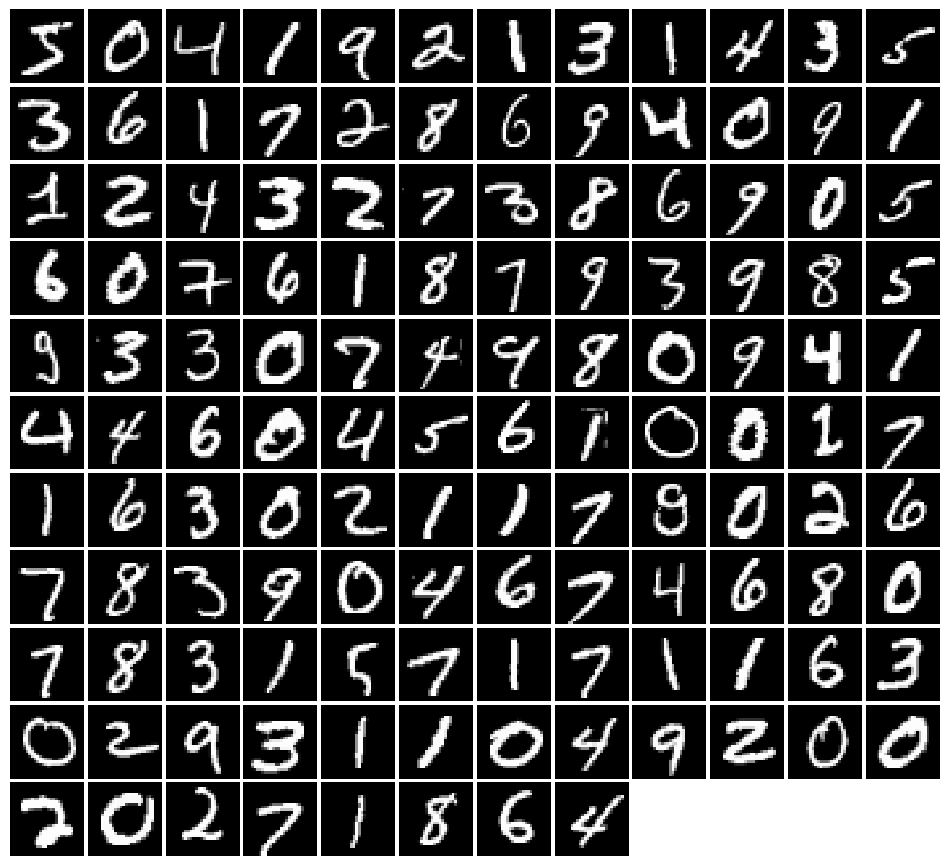

In [6]:
NOISE_DIM = 100
batch_size = 128

mnist = datasets.MNIST('./MNIST_data', train=True, download=True,
                           transform=transforms.ToTensor())
loader_train = DataLoader(mnist, batch_size=batch_size, drop_last=True)


imgs = next(loader_train.__iter__())[0].view(batch_size, 784).numpy().squeeze()
#next(loader_train.__iter__())[0]
show_images(imgs)

# Discriminator and Generator


In [7]:
class Flatten(nn.Module):
    def forward(self, x):
        #print(len(x.size()))
        if len(x.size())== 4:
          N, C, H, W = x.size() # read in N, C, H, W
        else:
          N, C = x.size() 
        return x.view(N, -1)  # "flatten" the C * H * W values into a single vector per image


In [8]:
def discriminator():
    """
    Initialize and return a simple discriminator model.
    """
    model = torch.nn.Sequential( Flatten(),
                                torch.nn.Linear(784, 256), 
                                torch.nn.LeakyReLU(),
                                torch.nn.Linear(256, 256), 
                                torch.nn.LeakyReLU(),
                                torch.nn.Linear(256, 1)
    )
    return model

In [9]:
def generator(noise_dim=NOISE_DIM):
    """
    Initialize and return a simple generator model.
    """
    
    model = nn.Sequential(
        Flatten(),
        torch.nn.Linear(noise_dim, 1024),
        torch.nn.ReLU(),
        torch.nn.Linear(1024, 1024),
        torch.nn.ReLU(),
        torch.nn.Linear(1024, 784),
        torch.nn.Tanh()
    )

    return model

Test to make sure the number of parameters in the generator is correct:

# Train

The simple model provided will train on MNIST in only a few minutes. You should expect results that resemble the following if your loss function and training loop implementations are correct:

<img src="gan_samples/mnist.jpg" width=500>

EPOCH:  1
Iter: 0, D: 1.371, G:0.6718


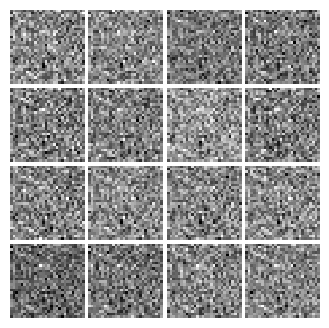


Iter: 250, D: 1.205, G:0.7531


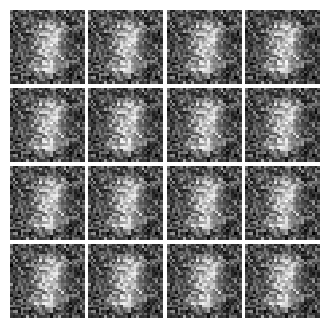


EPOCH:  2
Iter: 500, D: 1.157, G:1.305


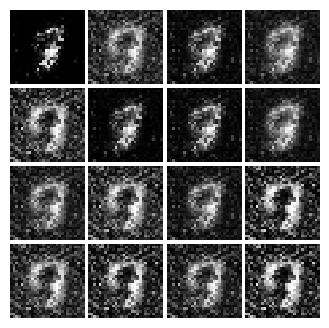


Iter: 750, D: 1.122, G:1.324


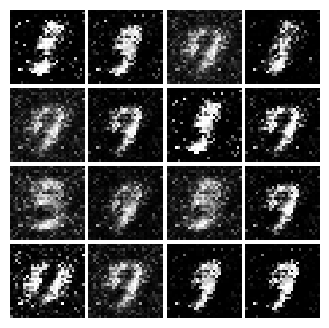


EPOCH:  3
Iter: 1000, D: 1.193, G:1.63


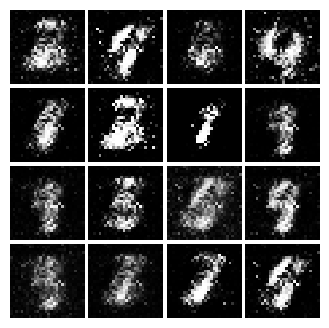


Iter: 1250, D: 1.169, G:1.121


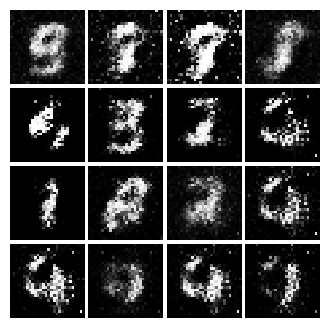


EPOCH:  4
Iter: 1500, D: 1.169, G:1.044


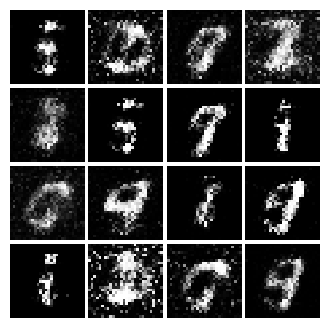


Iter: 1750, D: 1.277, G:0.7779


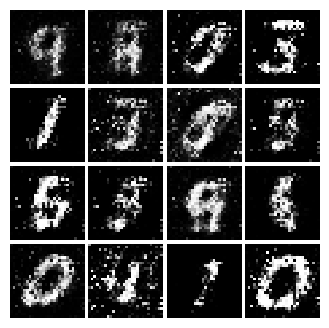


EPOCH:  5
Iter: 2000, D: 1.27, G:0.996


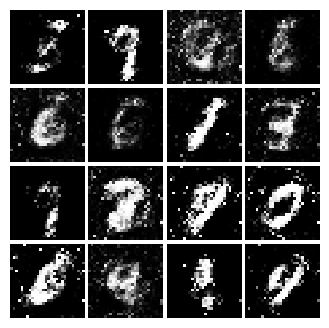


Iter: 2250, D: 1.234, G:0.8747


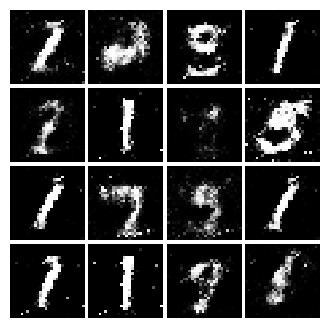


EPOCH:  6
Iter: 2500, D: 1.305, G:0.8085


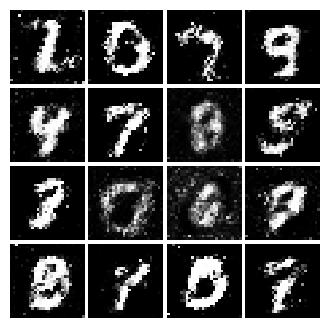


Iter: 2750, D: 1.402, G:0.8896


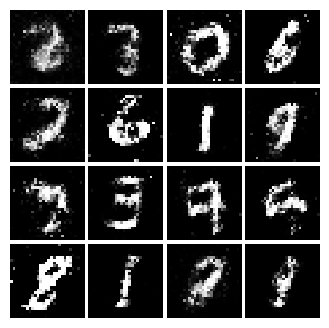


EPOCH:  7
Iter: 3000, D: 1.263, G:1.063


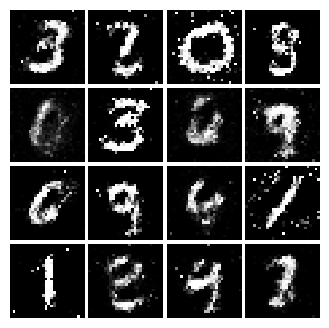


Iter: 3250, D: 1.187, G:0.9172


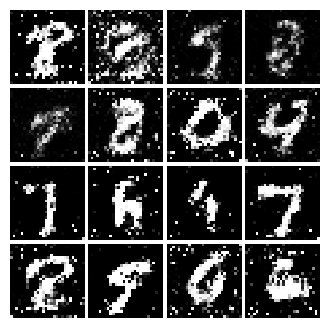


EPOCH:  8
Iter: 3500, D: 1.338, G:0.8947


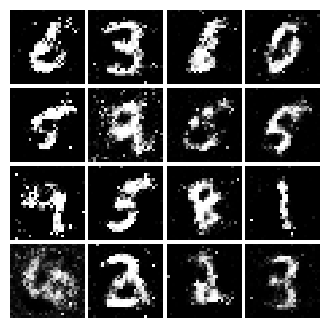


EPOCH:  9
Iter: 3750, D: 1.265, G:0.8548


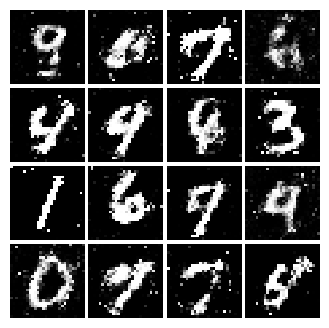


Iter: 4000, D: 1.288, G:0.7654


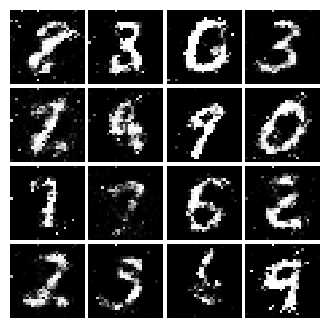


EPOCH:  10
Iter: 4250, D: 1.292, G:0.8943


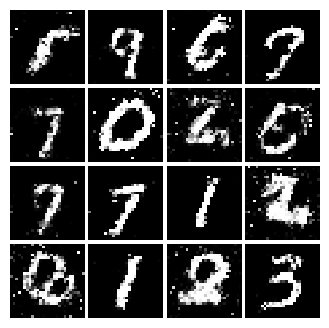


Iter: 4500, D: 1.237, G:0.7877


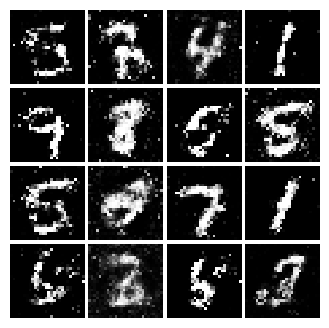


EPOCH:  11
Iter: 4750, D: 1.341, G:0.9287


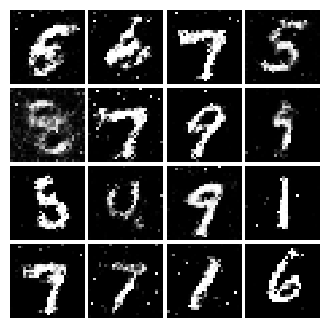


Iter: 5000, D: 1.251, G:0.9084


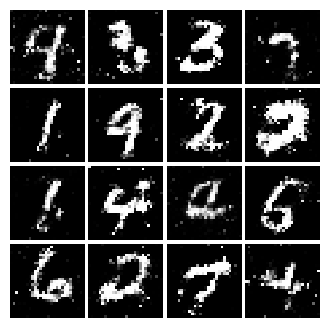


EPOCH:  12
Iter: 5250, D: 1.361, G:0.9299


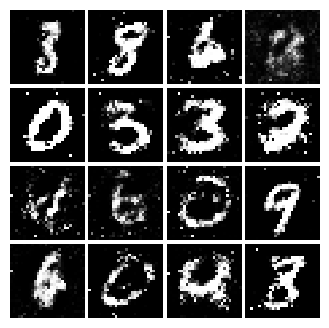


Iter: 5500, D: 1.304, G:0.8602


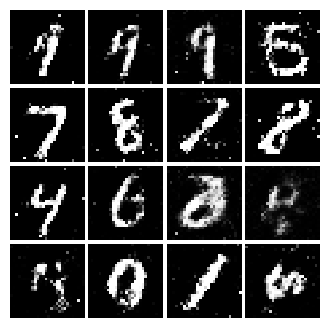


EPOCH:  13
Iter: 5750, D: 1.351, G:0.7932


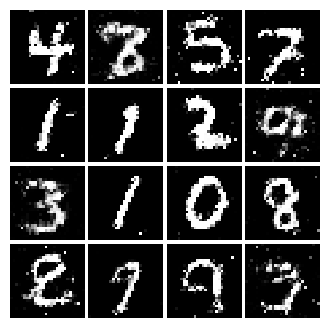


Iter: 6000, D: 1.217, G:0.868


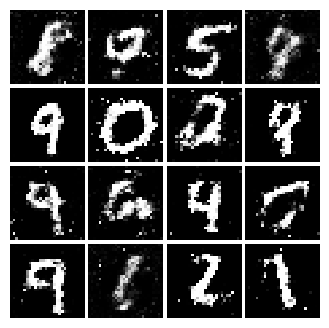


EPOCH:  14
Iter: 6250, D: 1.354, G:0.9652


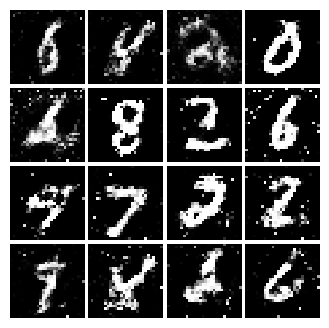


Iter: 6500, D: 1.295, G:0.8255


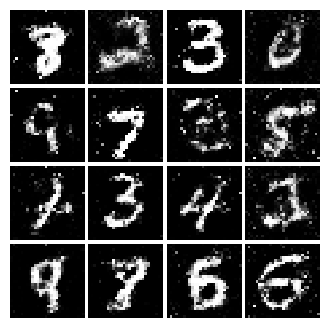


EPOCH:  15
Iter: 6750, D: 1.283, G:0.9527


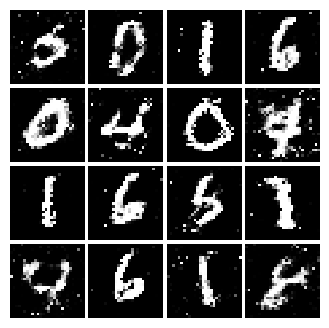


Iter: 7000, D: 1.311, G:0.8262


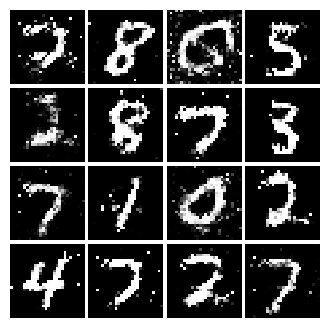


EPOCH:  16
Iter: 7250, D: 1.351, G:0.7294


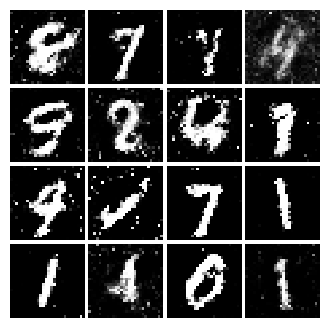


EPOCH:  17
Iter: 7500, D: 1.273, G:0.8412


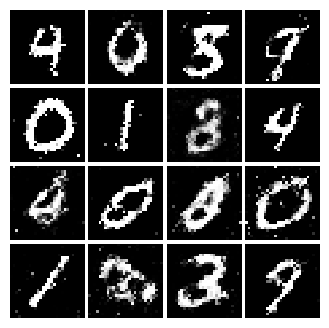


Iter: 7750, D: 1.305, G:0.9065


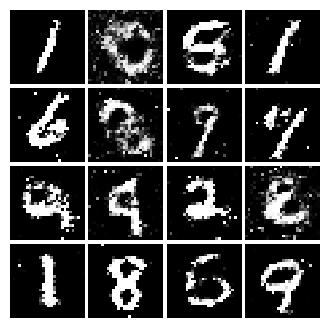


EPOCH:  18
Iter: 8000, D: 1.331, G:0.8132


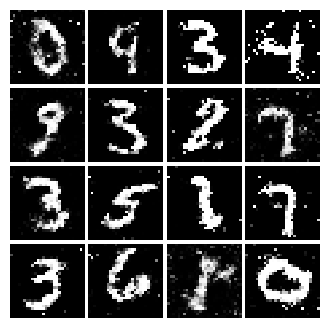


Iter: 8250, D: 1.359, G:0.7068


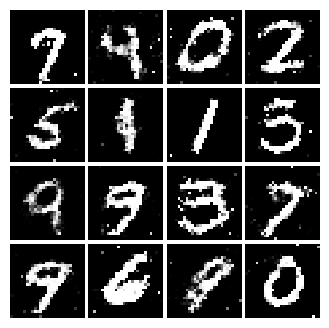


EPOCH:  19
Iter: 8500, D: 1.288, G:0.8077


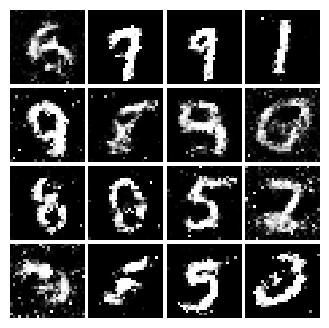


Iter: 8750, D: 1.285, G:0.8106


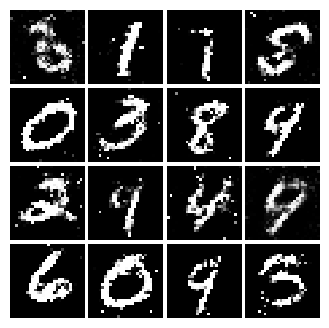


EPOCH:  20
Iter: 9000, D: 1.243, G:0.7762


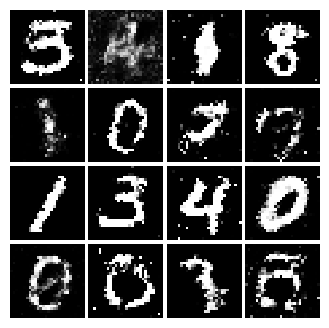


Iter: 9250, D: 1.354, G:0.8203


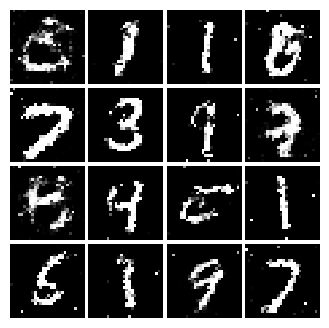


EPOCH:  21
Iter: 9500, D: 1.346, G:0.7727


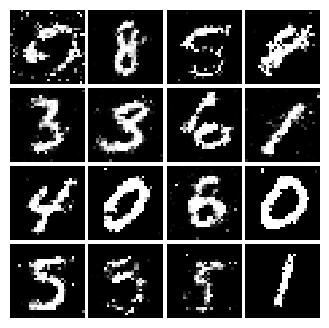


Iter: 9750, D: 1.287, G:0.9226


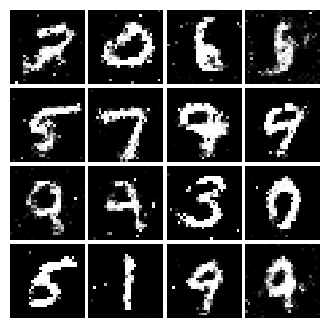


EPOCH:  22
Iter: 10000, D: 1.169, G:0.9764


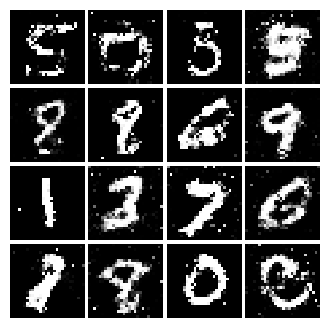


Iter: 10250, D: 1.261, G:0.8295


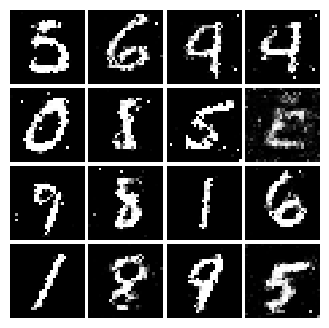


EPOCH:  23
Iter: 10500, D: 1.298, G:0.8376


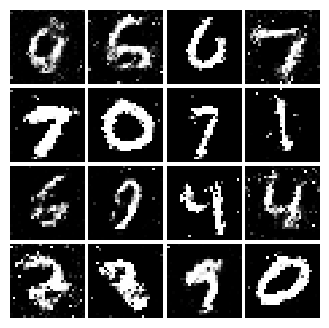


Iter: 10750, D: 1.282, G:0.8805


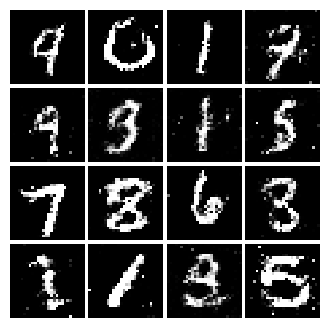


EPOCH:  24
Iter: 11000, D: 1.406, G:0.8273


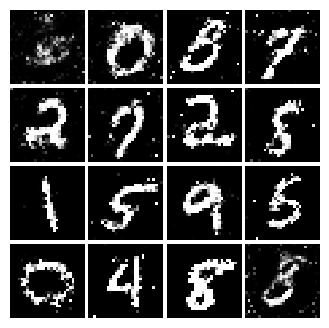


EPOCH:  25
Iter: 11250, D: 1.278, G:0.8764


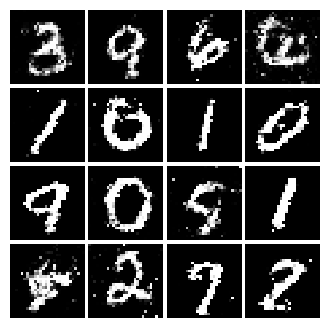


Iter: 11500, D: 1.332, G:0.8972


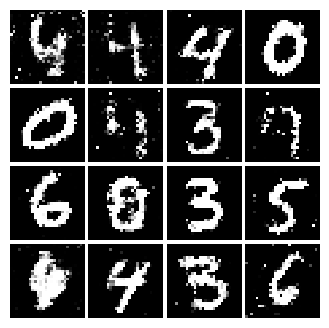


EPOCH:  26
Iter: 11750, D: 1.342, G:0.8214


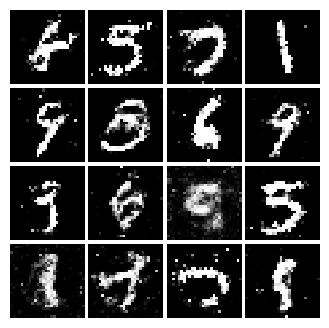


Iter: 12000, D: 1.251, G:0.7756


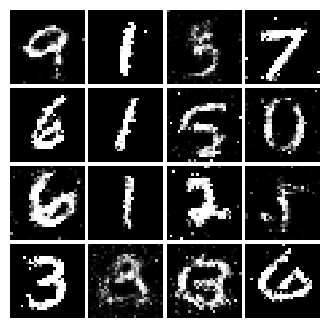


EPOCH:  27
Iter: 12250, D: 1.294, G:0.8778


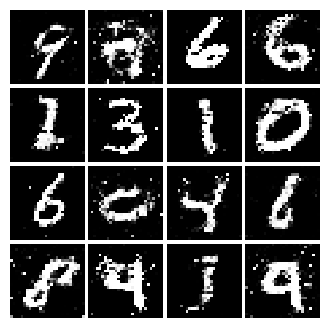


Iter: 12500, D: 1.197, G:0.8717


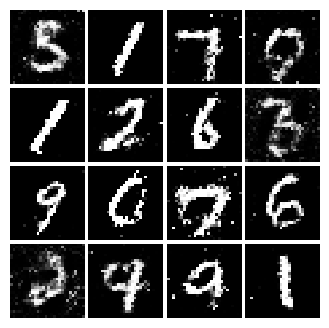


EPOCH:  28
Iter: 12750, D: 1.234, G:0.9709


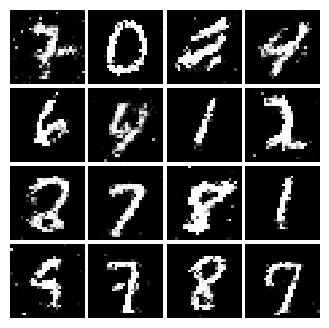


Iter: 13000, D: 1.262, G:0.8596


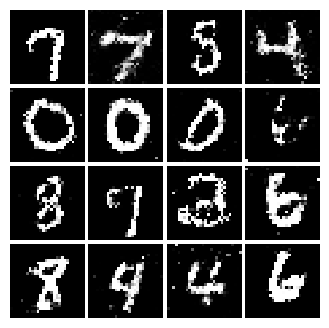


EPOCH:  29
Iter: 13250, D: 1.264, G:0.879


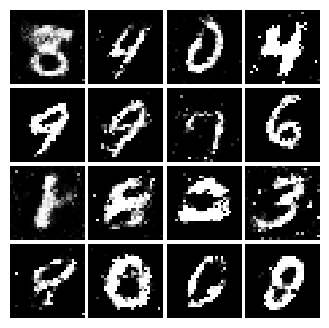


Iter: 13500, D: 1.257, G:0.9635


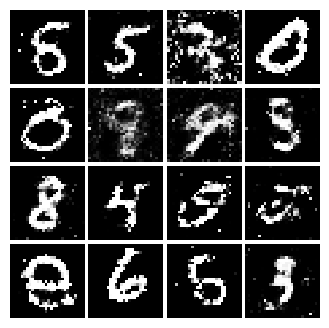


EPOCH:  30
Iter: 13750, D: 1.154, G:0.9764


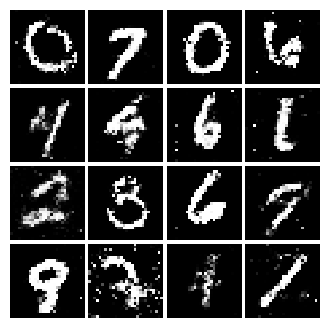


Iter: 14000, D: 1.253, G:0.847


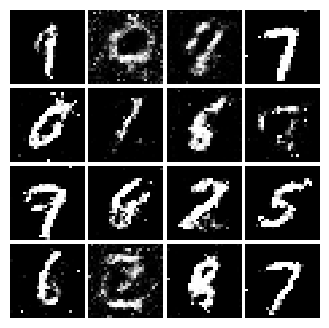

In [15]:
# original GAN
D = discriminator().to(device)
G = generator().to(device)

D_optimizer = torch.optim.Adam(D.parameters(), lr=1e-3, betas = (0.5, 0.999))
G_optimizer = torch.optim.Adam(G.parameters(), lr=1e-3, betas = (0.5, 0.999))

train(D, G, D_optimizer, G_optimizer, discriminator_loss, generator_loss, train_loader=loader_train, num_epochs=30, device=device)

EPOCH:  1
Iter: 0, D: 0.3694, G:0.4902


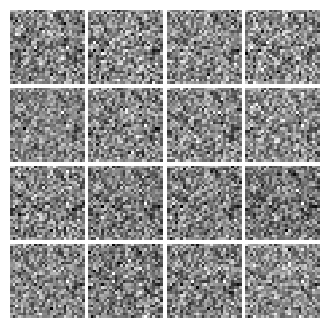


Iter: 250, D: 0.1317, G:0.3086


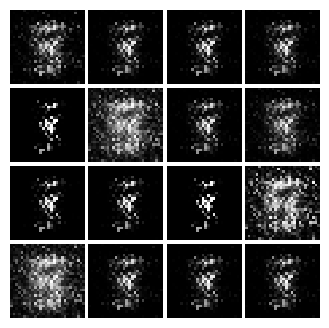


EPOCH:  2
Iter: 500, D: 0.1622, G:0.2869


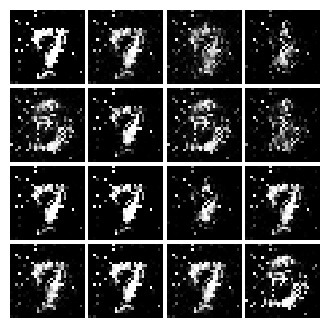


Iter: 750, D: 0.1231, G:0.5745


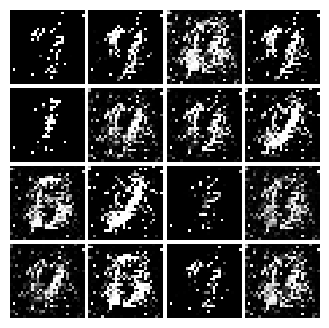


EPOCH:  3
Iter: 1000, D: 0.06159, G:0.4184


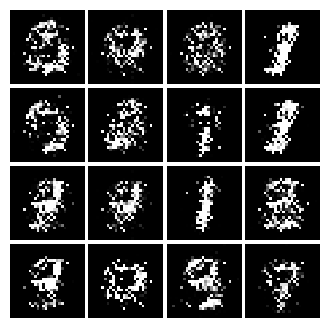


Iter: 1250, D: 0.1336, G:0.2935


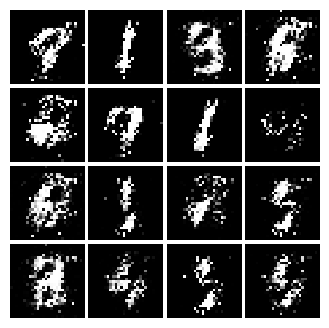


EPOCH:  4
Iter: 1500, D: 0.1951, G:0.2536


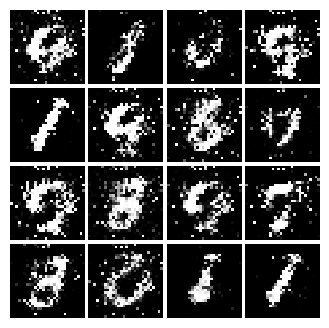


Iter: 1750, D: 0.1882, G:0.2176


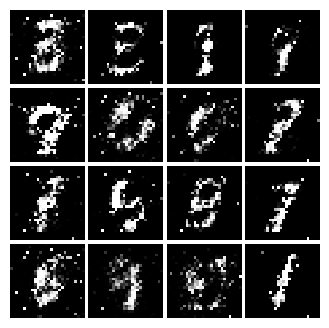


EPOCH:  5
Iter: 2000, D: 0.1953, G:0.1909


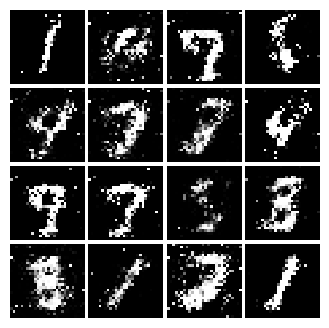


Iter: 2250, D: 0.2166, G:0.1641


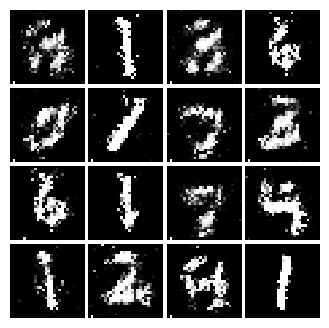


EPOCH:  6
Iter: 2500, D: 0.2189, G:0.1931


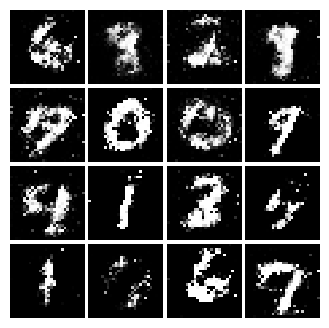


Iter: 2750, D: 0.2106, G:0.2621


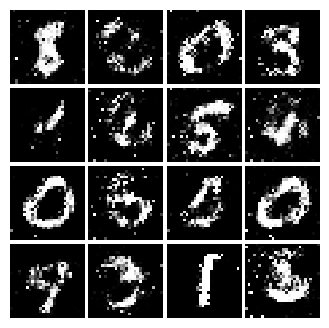


EPOCH:  7
Iter: 3000, D: 0.2214, G:0.171


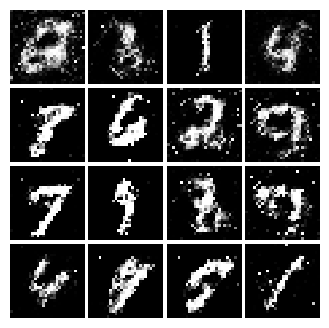


Iter: 3250, D: 0.2126, G:0.2135


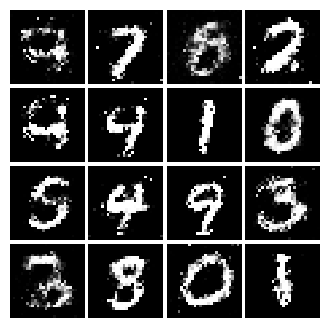


EPOCH:  8
Iter: 3500, D: 0.2226, G:0.1599


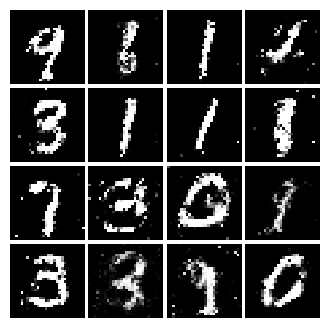


EPOCH:  9
Iter: 3750, D: 0.2386, G:0.1785


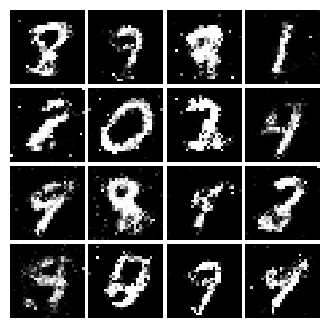


Iter: 4000, D: 0.2279, G:0.16


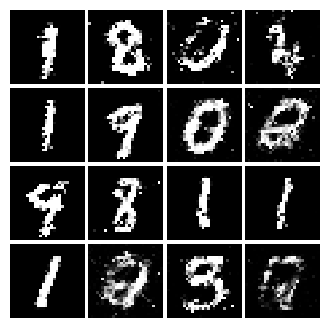


EPOCH:  10
Iter: 4250, D: 0.2229, G:0.1938


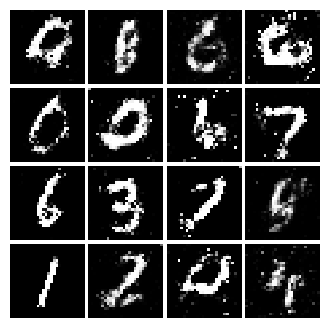


Iter: 4500, D: 0.2384, G:0.1737


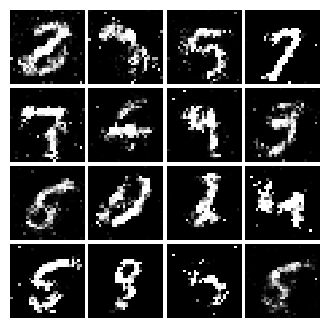


EPOCH:  11
Iter: 4750, D: 0.2346, G:0.1924


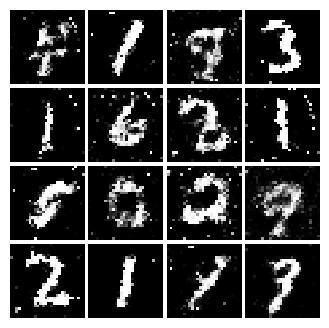


Iter: 5000, D: 0.2262, G:0.1803


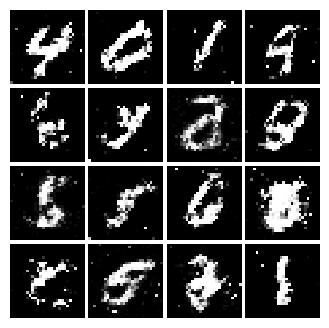


EPOCH:  12
Iter: 5250, D: 0.231, G:0.1771


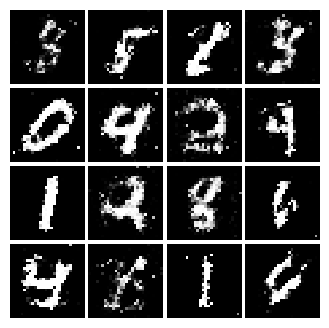


Iter: 5500, D: 0.2117, G:0.1603


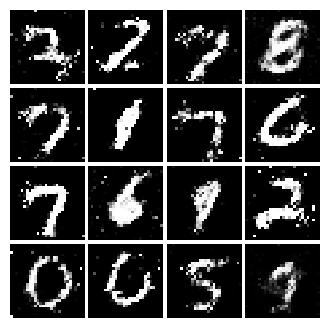


EPOCH:  13
Iter: 5750, D: 0.2347, G:0.21


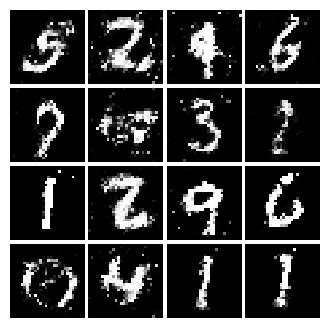


Iter: 6000, D: 0.2172, G:0.1989


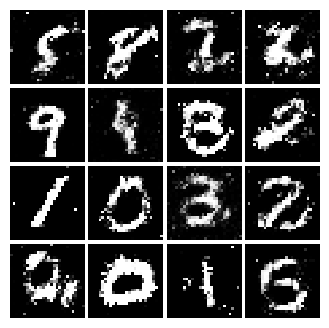


EPOCH:  14
Iter: 6250, D: 0.2237, G:0.182


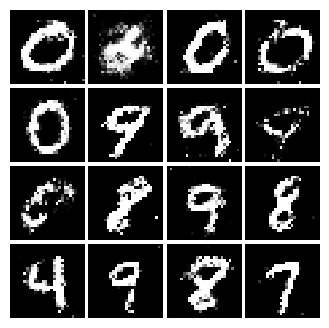


Iter: 6500, D: 0.2202, G:0.1761


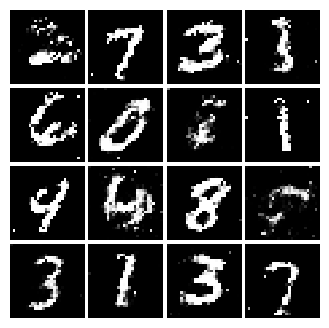


EPOCH:  15
Iter: 6750, D: 0.2399, G:0.1563


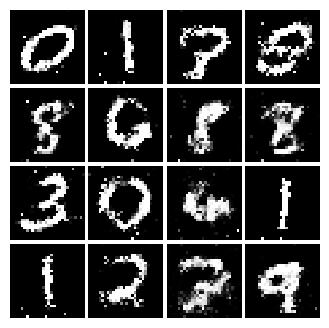


Iter: 7000, D: 0.2293, G:0.1798


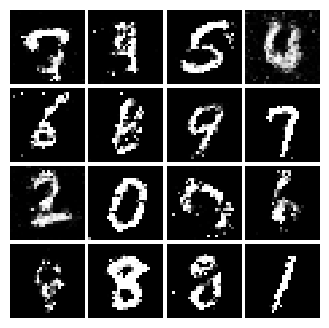


EPOCH:  16
Iter: 7250, D: 0.2467, G:0.1496


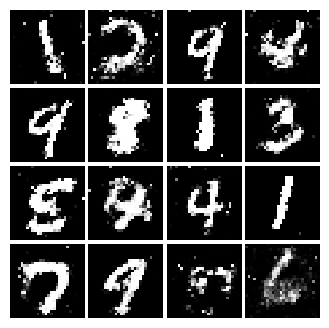


EPOCH:  17
Iter: 7500, D: 0.2365, G:0.1452


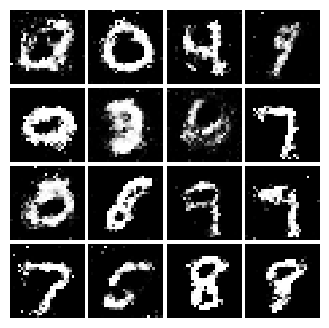


Iter: 7750, D: 0.2421, G:0.1534


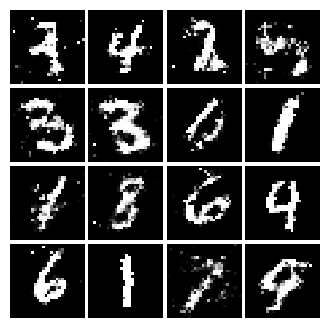


EPOCH:  18
Iter: 8000, D: 0.2208, G:0.1635


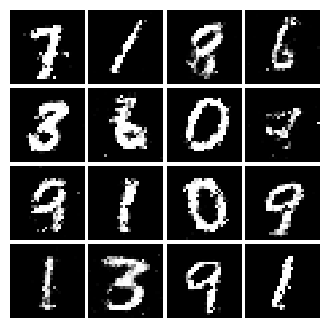


Iter: 8250, D: 0.2464, G:0.1427


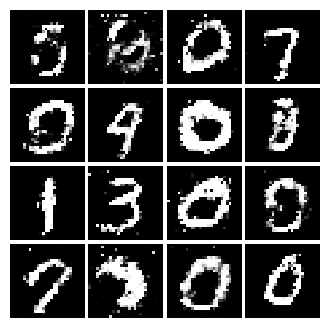


EPOCH:  19
Iter: 8500, D: 0.2379, G:0.136


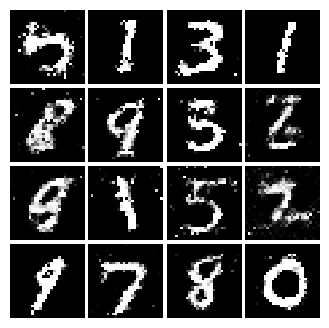


Iter: 8750, D: 0.2321, G:0.1487


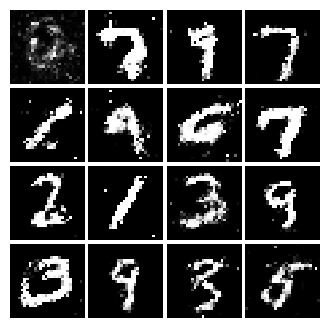


EPOCH:  20
Iter: 9000, D: 0.2124, G:0.1705


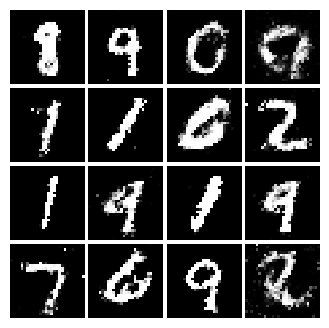


Iter: 9250, D: 0.2397, G:0.1577


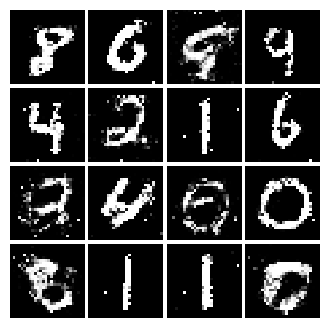

In [13]:
# LSGAN
D_LS = discriminator().to(device)
G_LS = generator().to(device)

D_LS_optimizer = torch.optim.Adam(D_LS.parameters(), lr=1e-3, betas = (0.5, 0.999))
G_LS_optimizer = torch.optim.Adam(G_LS.parameters(), lr=1e-3, betas = (0.5, 0.999))

train(D_LS, G_LS, D_LS_optimizer, G_LS_optimizer, ls_discriminator_loss, ls_generator_loss, train_loader=loader_train, num_epochs=20, device=device)